<a href="https://colab.research.google.com/github/Jorgechap/ndvi_python/blob/main/Trabajo_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar Librerias


In [ ]:
!pip install matplotlib-venn
!pip install rioxarray
!pip install geopandas
!pip install earthpy
!pip install rasterio
!!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


['\x1b[?25l',
 '\x1b[K     |                                | 10 kB 24.7 MB/s eta 0:00:03',
 '\x1b[K     |                                | 20 kB 11.4 MB/s eta 0:00:06',
 '\x1b[K     |                                | 30 kB 8.9 MB/s eta 0:00:07',
 '\x1b[K     |                                | 40 kB 8.1 MB/s eta 0:00:08',
 '\x1b[K     |                                | 51 kB 4.1 MB/s eta 0:00:15',
 '\x1b[K     |                                | 61 kB 4.3 MB/s eta 0:00:14',
 '\x1b[K     |                                | 71 kB 4.6 MB/s eta 0:00:14',
 '\x1b[K     |                                | 81 kB 5.1 MB/s eta 0:00:12',
 '\x1b[K     |                                | 92 kB 3.8 MB/s eta 0:00:16',
 '\x1b[K     |                                | 102 kB 4.0 MB/s eta 0:00:15',
 '\x1b[K     |                                | 112 kB 4.0 MB/s eta 0:00:15',
 '\x1b[K     |                                | 122 kB 4.0 MB/s eta 0:00:15',
 '\x1b[K     |                                | 133 kB 4.

# Importar Librerias


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import cv2 as cv

# Importar imagen NDI

In [ ]:
ndvi = os.path.join("/content/ndvipiñasentinel.tif")

ndvi  = rxr.open_rasterio(ndvi)
print(ndvi.shape)



(1, 82, 44)


## Graficar imagen del  NDVI


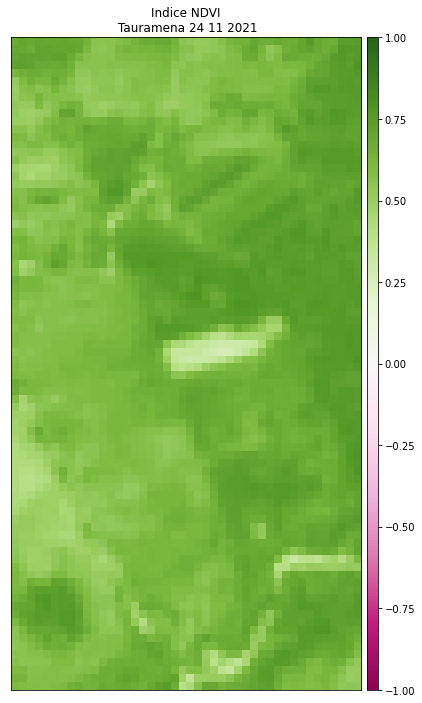

In [ ]:
ep.plot_bands(ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Indice NDVI\n Tauramena 24 11 2021")
plt.show()

Ver distribución de valores NDVI
Usando un histograma, puede ver la distribución de valores de píxeles en su salida NDVI.

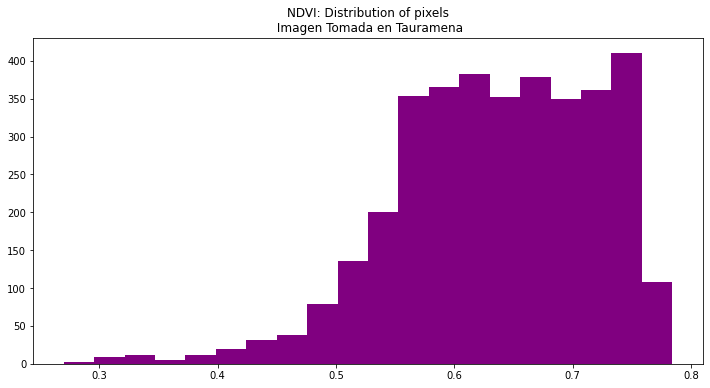

In [ ]:
ep.hist(ndvi.values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n Imagen Tomada en Tauramena"])

plt.show()

In [ ]:
type(ndvi), ndvi.dtype

(xarray.core.dataarray.DataArray, dtype('float32'))

Guardar imagen NDVI en formato PNG

In [ ]:
def Convert_To_Png_AndCut(dir):
    files = os.listdir(dir)
    ResultPath1 = "/content/"  # Definir la ruta de guardado después del formato de conversión
    ResultPath2 = "./RS_Cut_Result/"  # Definir la ruta de guardado después de recortar
    ResultPath3 = "./RS_Cut_Result/"  # Definir la ruta de guardado después de recortar
    for file in files:  # Aquí puede eliminar el bucle for
        a, b = os.path.splitext(file)  # Nombre de archivo de imagen dividida
        this_dir = os.path.join(dir + file)  # Construir y guardar ruta + nombre de archivo

        img = cv.imread(this_dir, 1)  # Leer imagen tif
        cv.imwrite(ResultPath1 + a + "_" + ".png", img)  # Guardar como formato png

# Nueva sección